In [ ]:
import pandas as pd

# Read the first CSV file into a DataFrame
df1 = pd.read_csv('/content/merged_Oneplus.csv')

# Read the second CSV file into another DataFrame
df2 = pd.read_csv('/content/merged_Realme narzo.csv')
# Read the second CSV file into another DataFrame
df3 = pd.read_csv('/content/merged_Redmi Note 11.csv')
df4 = pd.read_csv('/content/merged_Redmi10.csv')
df5 = pd.read_csv('/content/merged_Redmi9.csv')
df6 = pd.read_csv('/content/merged_samsung.csv')
df7 = pd.read_csv('/content/merged_vivo.csv')
df8 = pd.read_csv('/content/oppo_merged_file.csv')
# Merge the two DataFrames vertically
merged_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8], axis=0)

# Write the merged DataFrame to a new CSV file if needed
merged_df.to_csv('merged_data.csv', index=False)


In [61]:
import pandas as pd
merged_df=pd.read_csv('/content/merged_data (1).csv')
df3=merged_df.copy()
df3

,Product Name,Cleaned_Review,rating,Sentiment,text_length,Predicted Label
0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",nice allrounder phone sometimes bug apps solve...,4.0,1,9.0,value for money
1,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",worst mobile ever oneplus chinese mobile scree...,1.0,0,9.0,display
2,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",good nice mobile also nice camera good quality...,5.0,1,9.0,value for money
3,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",nice mobile media could not load best phone pr...,5.0,1,9.0,value for money
4,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",nice good handy media could not load nice product,5.0,1,9.0,performance
...,...,...,...,...,...,...
19326,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",average accord prize every thing good data sho...,4.0,1,11.0,display
19327,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",camera bad phone camera bad buy phone big mist...,1.0,0,11.0,camera
19328,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",buy may weeks earphone slot not work please do...,1.0,0,11.0,display
19329,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",worst phone ever hang issue everything issue p...,1.0,0,11.0,performance


In [62]:
# prompt: Using dataframe df3:

df3.groupby(['Product Name', 'Sentiment']).size().reset_index()


,Product Name,Sentiment,0
0,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)",0,944
1,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)",1,2658
2,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,378
3,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,1725
4,Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,0,1176
5,Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,1,1889
6,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",0,1237
7,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",1,2584
8,"Redmi Note 11 (Space Black, 4GB RAM, 64GB Stor...",0,806
9,"Redmi Note 11 (Space Black, 4GB RAM, 64GB Stor...",1,1587


In [64]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19331 entries, 0 to 19330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Name     19331 non-null  object 
 1   Cleaned_Review   19331 non-null  object 
 2   rating           19331 non-null  float64
 3   Sentiment        19331 non-null  int64  
 4   text_length      19331 non-null  float64
 5   Predicted Label  19331 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 906.3+ KB


Sentiment Analysis Accuracy: 0.8580294802172227
Precision: 0.8714944976925808
Recall: 0.929220287660863
F1 Score: 0.8994321304268181
Confusion Matrix:
[[ 863  362]
 [ 187 2455]]
Mean Squared Error for Ratings: 5.034545381435629


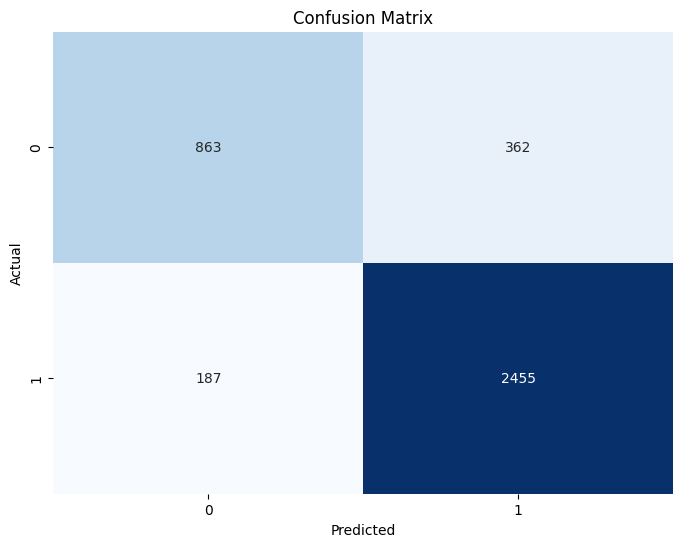

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, mean_squared_error,precision_score, recall_score, f1_score, confusion_matrix
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
# Split the data into training and testing sets
X = df3['Cleaned_Review']  # Text data
y_sentiment = df3['Sentiment']  # Positive or Negative labels
y_rating = df3['rating']  # Numeric ratings

X_train, X_test, y_sentiment_train, y_sentiment_test, y_rating_train, y_rating_test = train_test_split(X, y_sentiment, y_rating, test_size=0.2, random_state=42)

# Create TF-IDF vectors from the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a sentiment analysis model (e.g., Multinomial Naive Bayes)
sentiment_classifier = MultinomialNB()
sentiment_classifier.fit(X_train_tfidf,y_sentiment_train)

# Predict sentiment on the test set
y_sentiment_pred = sentiment_classifier.predict(X_test_tfidf)

# Convert string labels to binary (0 and 1)
label_encoder = LabelEncoder()
y_sentiment_test_binary = label_encoder.fit_transform(y_sentiment_test)
y_sentiment_pred_binary = label_encoder.transform(y_sentiment_pred)

# Evaluate the sentiment analysis model
sentiment_accuracy = accuracy_score(y_sentiment_test_binary, y_sentiment_pred_binary)
sentiment_precision = precision_score(y_sentiment_test_binary, y_sentiment_pred_binary)
sentiment_recall = recall_score(y_sentiment_test_binary, y_sentiment_pred_binary)
sentiment_f1 = f1_score(y_sentiment_test_binary, y_sentiment_pred_binary)
conf_matrix = confusion_matrix(y_sentiment_test_binary, y_sentiment_pred_binary)

# Calculate sentiment scores using TextBlob for the entire dataset
df3['textblob_sentiment'] = df3['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Normalize TextBlob sentiment scores to the [0, 1] scale
df3['normalized_sentiment'] = (df3['textblob_sentiment'] + 1) / 2

# Combine the model's predicted sentiment with TextBlob sentiment scores
df3['combined_sentiment'] = (df3['normalized_sentiment'] + (y_sentiment == 'positive').astype(int)) / 2

# Calculate the overall rating score on a scale of 5
df3['overall_rating'] = 5 *df3['combined_sentiment']

# Calculate the Mean Squared Error (MSE) for the ratings
rating_mse = mean_squared_error(y_rating_test,df3.loc[y_rating_test.index, 'overall_rating'])

# Print results
print(f'Sentiment Analysis Accuracy: {sentiment_accuracy}')
print(f'Precision: {sentiment_precision}')
print(f'Recall: {sentiment_recall}')
print(f'F1 Score: {sentiment_f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Mean Squared Error for Ratings: {rating_mse}')
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [69]:
# Count the number of positive (True) and negative (False) reviews
num_positive_reviews = y_sentiment_pred.sum()
num_negative_reviews = total_reviews - num_positive_reviews  # Assuming binary classification

# Calculate the percentage of positive and negative reviews
percentage_positive = (num_positive_reviews / total_reviews) * 100
percentage_negative = (num_negative_reviews / total_reviews) * 100

print(f'Percentage of Positive Reviews: {percentage_positive}%')
print(f'Percentage of Negative Reviews: {percentage_negative}%')

# Assign numeric values to sentiment classes
y_sentiment_pred_numeric = y_sentiment_pred.astype(int)

# Calculate the ratings based on sentiment predictions
ratings_based_on_sentiment = y_sentiment_pred_numeric * 5  # Assuming a scale of 5 for ratings

# Calculate the average rating
average_rating = ratings_based_on_sentiment.mean()

print(f'Average Rating based on Sentiment Predictions: {average_rating:.2f}')

Percentage of Positive Reviews: 72.84716834755625%
Percentage of Negative Reviews: 27.152831652443755%
Average Rating based on Sentiment Predictions: 3.64


In [67]:
# Create a function to calculate ratings based on sentiment percentages
def calculate_rating(positive_percentage, negative_percentage, rating_scale=5):
    # The formula to calculate the rating based on sentiment percentages
    rating = (positive_percentage / 100) * rating_scale

    # Optionally, you can adjust the rating based on the negative sentiment percentage
    # For example, reduce the rating if there is a significant negative sentiment
    # rating -= (negative_percentage / 100) * rating_scale

    return rating

# Create a dictionary to store ratings for each label
label_ratings = {}

# Calculate and store ratings based on sentiment percentages for each label
for label in unique_labels:
    positive_percentage = label_sentiments[label]['Positive Percentage']
    negative_percentage = label_sentiments[label]['Negative Percentage']

    rating = calculate_rating(positive_percentage, negative_percentage)

    label_ratings[label] = rating

# Print the ratings
for label in unique_labels:
    print(f'Label: {label}')
    print(f'Label: {label}')
    print(f'Positive Percentage: {label_sentiments[label]["Positive Percentage"]:.2f}%')
    print(f'Negative Percentage: {label_sentiments[label]["Negative Percentage"]:.2f}%')

    print(f'Rating: {label_ratings[label]:.2f} out of 5')
    print()


Label: value for money
Label: value for money
Positive Percentage: 95.10%
Negative Percentage: 4.90%
Rating: 4.75 out of 5

Label: display
Label: display
Positive Percentage: 55.17%
Negative Percentage: 44.83%
Rating: 2.76 out of 5

Label: performance
Label: performance
Positive Percentage: 57.62%
Negative Percentage: 42.38%
Rating: 2.88 out of 5

Label: camera
Label: camera
Positive Percentage: 57.39%
Negative Percentage: 42.61%
Rating: 2.87 out of 5

Label: battery
Label: battery
Positive Percentage: 62.34%
Negative Percentage: 37.66%
Rating: 3.12 out of 5



In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import joblib

# Example: Train and save the model with TF-IDF vectorizer
texts = ["nice all-rounder phone, sometimes bug apps, solve minor update",
         "not good phone, battery backup not good, hang problem",
         "good phone, good budget phone, light-weight awesome phone"]
labels = ["positive", "negative", "positive"]

# Create a pipeline with TfidfVectorizer and MultinomialNB
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Fit the model
model.fit(texts, labels)

# Save the model and TF-IDF vectorizer separately
joblib.dump(model, "Sentiment_model.pkl")
joblib.dump(model.named_steps['tfidfvectorizer'],"tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [59]:
import joblib

# Load the model from the file
loaded_model = joblib.load("Sentiment_model.pkl")

# Example: Use the loaded model for prediction
text_to_predict = "good smartphone good phone camera average overall thing nice"
prediction = loaded_model.predict([text_to_predict])

print("Prediction:", prediction[0])


Prediction: positive


In [27]:
import pickle

# Save your model to a file using pickle
model = MultinomialNB()  # Replace with your actual trained model
tfidf_vectorizer = TfidfVectorizer()
model_file_path = '/content/sentiment_model.pkl'  # Provide the full file path for the model
tfidf_vectorizer_file_path = '/content/tfidf_vectorizer.pkl'  # Provide the full file path for the TF-IDF vectorizer

with open(model_file_path, 'wb') as model_file:
    pickle.dump(model, model_file)

with open(tfidf_vectorizer_file_path, 'wb') as tfidf_file:
    pickle.dump(tfidf_vectorizer, tfidf_file)

# Load the model and TF-IDF vectorizer from the saved files
with open(model_file_path, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open(tfidf_vectorizer_file_path, 'rb') as tfidf_file:
    loaded_tfidf_vectorizer = pickle.load(tfidf_file)

